# Advanced peakbagging

In the [Quickstart tutorial](https://apollinaire.readthedocs.io/en/latest/usage/quickstart/first_steps.html), it was explained how to quickly handle seismic data and perform peakbagging over it. However, when dealing with individual mode parameters, you will sometimes need more flexibility on the fit you want to perform.
The goal of this tutorial is to show you how to make an individual analysis of the background and then perform an advanced fit on individual parameters thanks to the *a2z* input format.

In [1]:
import numpy as np
import apollinaire.peakbagging as apn_pkb
import apollinaire as apn

In [2]:
apn.__version__

'1.3.1'

In [3]:
t, v = apn.timeseries.load_light_curve (star='006603624')

dt = np.median (t[1:] - t[:-1]) * 86400
freq, psd = apn.psd.series_to_psd (v, dt=dt, correct_dc=True)
freq, psd = freq*1e6, psd*1e-6

## Dealing with the background

The `explore_distribution_background` allows you to explore the parameter distribution of the background model. In this example, the resolution of the fitted PSD is degraded through the `quickfit` argument in order to save computing time. Actually using the PSD with full resolution may require a large amount of MCMC `nsteps` with a lot of burn-in (controlled by the `discard` argument) to converge and get the correct posterior distribution.

> **Note**: Using the `quickfit` argument filters out the p-mode power excess in the fitted background model, therefore we do not show the corresponding Gaussian function in the summary plot.

Beginning fit


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:26<00:00, 11.60it/s]


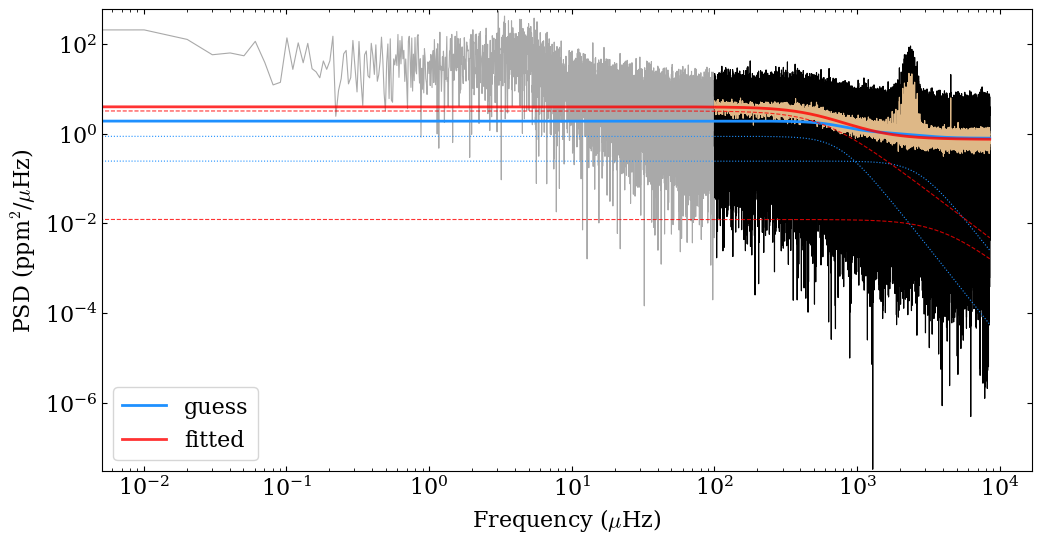

In [4]:
(fitted_back, 
 param_mcmc, 
 sigma) = apn_pkb.explore_distribution_background (freq, psd, n_harvey=2, fit_log=True, low_cut=100, nsteps=1000,
                                              nwalkers=64, discard=200, parallelise=True,
                                              quickfit=True, progress=True, power_law=False,
                                              spectro=False, show_gaussian=False)

## Individual mode parameters determination

With the determination of the background done, we are ready to begin the determination of the individual mode parameters. For this purpose, you need to create a *a2z* file that will be read by the `peakbagging` function. The file `input_golf.a2z` is given as an example of the most complex pattern you are able to fit. It contains guess for solar p-mode from $n=8$ to $27$ and $\ell=0$ to $3$.

In [5]:
with apn_pkb.get_template_path ("input_golf.a2z") as a2z_file :
    df = apn_pkb.read_a2z (a2z_file)
print (df.iloc[247:266].to_string (index=False, header=False)) #show just a part of the df

23 2  split mode    0.400000 0.0 0.0  1.000000e-01    0.800000
23 2  width mode    2.242577 0.0 0.0  1.000000e-08    8.000000
23 2   freq mode 3430.868400 0.0 0.0  3.428868e+03 3432.868400
24 2   asym mode   -0.014523 0.0 0.0 -2.000000e-01    0.200000
24 2 height mode    0.003577 0.0 0.0  1.000000e-08    0.017887
24 2  split mode    0.400000 0.0 0.0  1.000000e-01    0.800000
24 2  width mode    3.222189 0.0 0.0  1.000000e-08    8.000000
24 2   freq mode 3567.029200 0.0 0.0  3.565029e+03 3569.029200
25 2   asym mode   -0.014482 0.0 0.0 -2.000000e-01    0.200000
25 2 height mode    0.001987 0.0 0.0  1.000000e-08    0.009934
25 2  split mode    0.400000 0.0 0.0  1.000000e-01    0.800000
25 2  width mode    4.598504 0.0 0.0  1.000000e-08    8.000000
25 2   freq mode 3703.527800 0.0 0.0  3.701528e+03 3705.527800
26 2   asym mode   -0.010668 0.0 0.0 -2.000000e-01    0.200000
26 2 height mode    0.001101 0.0 0.0  1.000000e-08    0.005504
26 2  split mode    0.400000 0.0 0.0  1.000000e-01    0

Here, each parameters is individual for a given degree. It is also possible to share a parameter between element of same order $n$ and distinct degrees $\ell$ (note that, here, when using the expression *same order $n$*, it is meant to designate pairs of mode with $(n,\ell=0);(n-1,\ell=2)$ and $(n,\ell=1);(n-1,\ell=3)$. Here is an example of *a2z* input for the star we are concerned with in this tutorial:

In [6]:
with apn_pkb.get_template_path ("input_saxo.a2z") as a2z_file :
    df = apn_pkb.read_a2z (a2z_file)
print (df.to_string (index=False, header=False)) 

19 0   freq   mode 2256.762699 0.0 0.0 2249.605088 2263.920310
20 0   freq   mode 2366.928778 0.0 0.0 2359.771167 2374.086388
21 0   freq   mode 2477.267291 0.0 0.0 2470.109681 2484.424902
22 0   freq   mode 2587.778241 0.0 0.0 2580.620630 2594.935851
23 0   freq   mode 2698.461625 0.0 0.0 2691.304014 2705.619236
 a 0  amp_l global    1.000000 0.0 0.0    0.000000    0.000000
19 1   freq   mode 2198.735167 0.0 0.0 2191.577557 2205.892778
20 1   freq   mode 2308.901246 0.0 0.0 2301.743635 2316.058857
21 1   freq   mode 2419.239760 0.0 0.0 2412.082149 2426.397370
22 1   freq   mode 2529.750709 0.0 0.0 2522.593098 2536.908319
23 1   freq   mode 2640.434093 0.0 0.0 2633.276482 2647.591704
 a 1  amp_l global    1.500000 0.0 0.0    0.000000    0.000000
18 2   freq   mode 2251.859534 0.0 0.0 2244.701923 2259.017145
19 2   freq   mode 2362.025612 0.0 0.0 2354.868002 2369.183223
20 2   freq   mode 2472.364126 0.0 0.0 2465.206516 2479.521737
21 2   freq   mode 2582.875075 0.0 0.0 2575.717465 2590

We are going to fit only one order here, but it is obviously possible to include at once all the order you want to fit in the `order_to_fit` argument.

In [7]:
order_to_fit = [21]
with apn_pkb.get_template_path ("input_saxo.a2z") as a2z_file :
    df_a2z_fitted = apn_pkb.peakbagging (a2z_file, freq, psd, back=fitted_back, 
                                 spectro=False, nsteps_mcmc=1000, mcmcDir="advanced_peakbagging_tutorial",
                                 progress=True, strategy='order', discard=200, order_to_fit=order_to_fit,
                                 show_corner=True, bins=30, parallelise=True, store_chains=True,
                                 format_cornerplot="png")

Orders to fit: 21
Fitting on order 21
Window width: 96.7 muHz, with low bound at 2399.9 muHz and up bound at 2496.6 muHz
Chain will be saved at: advanced_peakbagging_tutorial/mcmc_sampler_order_21.h5
advanced_peakbagging_tutorial/mcmc_sampler_order_21.h5 already exists, existing chains set to 'read', no sampling has been performed, proceeding to next step.
Ensemble sampling achieved


![cornerplot example](advanced_peakbagging_tutorial/mcmc_sampler_order_21_cornerplot.png )